# Naive Bayes Classifier

It's basically based on bayes theorem of probabilty.\

$P(Retire/X)=\frac{P(X/Retire)* P(Retire)}{P(X)}$

Where X : **Given features**

A new customer given features like age and saving, will decide whether he gona retire of not.\

**Assumption**: The features are independent of each others (Which is actually not true)

# Project:  Yelp review

USA based app that give the quality of a service and bussiness based on the coustomers rating

## Import Liberaries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read data
df_yelp=pd.read_csv(r'E:\PREPARATIONS\Projects\Projects\NLP\yelp.csv')

In [3]:
df_yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
df_yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [5]:
df_yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [6]:
df_yelp.iloc[-1]['text']

'4-5 locations.. all 4.5 star average.. I think Arizona really has some fantastic Pizza options, and Spinatos is at the top of my pizza fix list.. the semi sweet sauce is addictive, great service, fresh ingredients, The Spicy Italian is my favorite... The chocolate chips cookies are laced with mind altering drugs, that make your body parts"romantic" when you think of their cookies.. BTW 5:30pm, on a Tuesday, when we left, a 30 minute wait.. Its on the List..'

## Data Visulization

In [7]:
# Create one new feature of lenth of text reviw
df_yelp['length']=df_yelp['text'].apply(lambda x: len(x))

In [8]:
df_yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


<Axes: ylabel='Frequency'>

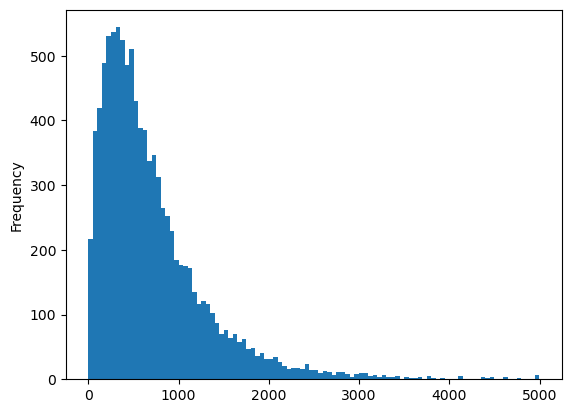

In [9]:
## Plot of length of review
df_yelp['length'].plot(bins=100,kind='hist')

In [10]:
df_yelp.length.describe()

count    10000.000000
mean       710.738700
std        617.399827
min          1.000000
25%        294.000000
50%        541.500000
75%        930.000000
max       4997.000000
Name: length, dtype: float64

In [11]:
df_yelp[df_yelp['length']==4997].iloc[0]['text']

'In our continuing quest to identify cool, locally owned places to eat and/or drink, Caroline and I auditioned Vintage 95 last night. \n\nBefore I go further, understand that whenever I go out for eats or drinks, I have  in  mind a Platonic Ideal of the Bar/Pub/Eatery I most want to frequent. I\'m on a constant quest to find that  Ideal expressed in Real Life. \n\nVintage 95 isn\'t quite there, but it\'s damn close. If I ever give something Five Stars, you\'ll know it has pegged my Platonic Ideal. Anyway...\n\nThe plan last night was for drinks. No plans for food, just Adult Beverages and warm conversation. But it turned into more.\n\nThe location in downtown Chandler is terrific for us. The owners have created a very fine visual experience - leather, stone, dark woods, good lighting. And they don\'t have the music turned up so loud that you CANNOT HAVE A CONVERSATION. This is one of my pet peeves. If I want to stare at people move their mouths while enduring an aural assault, I\'ll st

In [12]:
df_yelp[df_yelp['length']==710]

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
980,WNy1uzcmm_UHmTyR--o5IA,2010-02-24,rai0XuKom2GYz3qQ8lN9LA,5,I went here for lunch a couple of weeks ago wi...,review,Q4c-HD4iycZGrAnNK6d0tw,1,1,0,710
1172,lXUaypwLG_rIU4qnpBmF-A,2012-08-31,vz4xCCersFRfDXl2qhvAWA,5,"Yes, it's on the Northwest side and its tucked...",review,uBp2Jmip2qXQ0iWHUDY9sQ,3,3,2,710
1866,yb17xHvhDJthJGS10uhFeQ,2009-07-01,GMm0xFMRArZX7lztrWPG8Q,4,One of my new favorite neighborhood bars! \n\n...,review,hq0WUfau1Mh3GyHn8oVdNQ,4,4,1,710
3876,4r9-iKOagzn5oUvPE9Bz4Q,2011-12-07,ny6Jlfysm6VTYgqmm6l3PA,5,Fantastic venue! Province really adds a touch ...,review,nSLrExcVVphiNzvSf5H7vA,1,1,1,710
5134,zp713qNhx8d9KCJJnrw1xA,2011-08-07,CgChEdEM0NYLA8M-oDzaCw,4,I love the artwork. Its a tiny little restaur...,review,d0wJVf7Gv7v1B-HHYhxZtQ,1,1,0,710
6736,eClo8BPc90-YdBfuvRcpkg,2008-03-17,wehQdhTXfnLGnX2QUP_6mg,3,The best place to skip work and goofy golf in ...,review,8VbK8pAotgfI0bnGfqPykg,10,10,6,710
8401,hZRLGfRrZTo9up2P-0aAHg,2010-07-09,zWhVRsQ80-6EVlT4EIU6MQ,4,So far the only thing I have eaten at Verde th...,review,3VIRjR2V29TOaI9u64hMig,1,1,0,710
9783,Re0Xw-AYkn6NK7QRk3kPEg,2009-02-18,vVaUMlzYJPc0pWV46XT8YA,3,"For such a small space, Stinkweeds definitely ...",review,FxxYCRPcpd__yhRRmmtyMQ,0,0,0,710


<Axes: xlabel='count', ylabel='stars'>

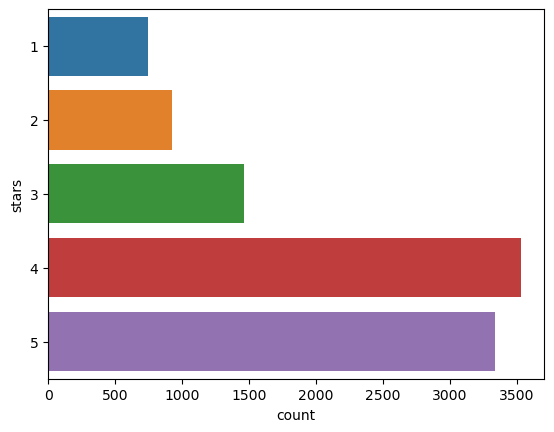

In [13]:
## plot of count of review on the basis of star rating
sns.countplot(y='stars',data=df_yelp)

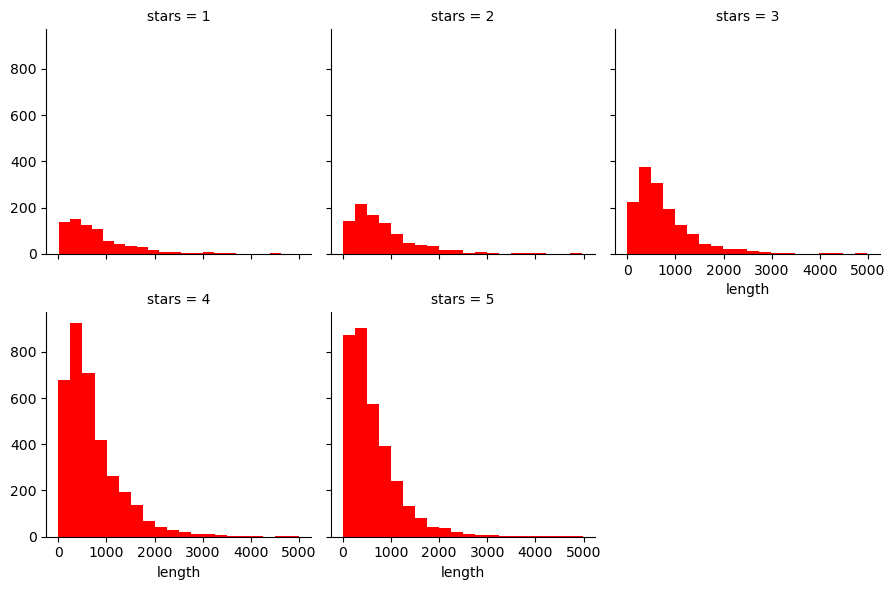

In [14]:
##  let's visulise the star rating vs length of text of review in seperate histogram
g=sns.FacetGrid(data=df_yelp,col='stars',col_wrap=3)
g.map(plt.hist,'length',bins=20, color='r')

### Make two different data frames for one star and five star review of business

In [15]:
df_yelp_1=df_yelp[df_yelp['stars']==1]
df_yelp_1

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
23,IJ0o6b8bJFAbG6MjGfBebQ,2010-09-05,Dx9sfFU6Zn0GYOckijom-g,1,U can go there n check the car out. If u wanna...,review,zRlQEDYd_HKp0VS3hnAffA,0,1,1,594
31,vvA3fbps4F9nGlAEYKk_sA,2012-05-04,S9OVpXat8k5YwWCn6FAgXg,1,Disgusting! Had a Groupon so my daughter and ...,review,8AMn6644NmBf96xGO3w6OA,0,1,0,361
35,o1GIYYZJjM6nM03fQs_uEQ,2011-11-30,ApKbwpYJdnhhgP4NbjQw2Q,1,"I've eaten here many times, but none as bad as...",review,iwUN95LIaEr75TZE_JC6bg,0,4,3,1198
61,l4vBbCL9QbGiwLuLKwD_bA,2011-11-22,DJVxOfj2Rw9zklC9tU3i1w,1,I have always been a fan of Burlington's deals...,review,EPROVap0M19Y6_4uf3eCmQ,0,0,0,569
64,CEswyP-9SsXRNLR9fFGKKw,2012-05-19,GXj4PNAi095-q9ynPYH3kg,1,Another night meeting friends here. I have to...,review,MjLAe48XNfYlTeFYca5gMw,0,1,2,498
...,...,...,...,...,...,...,...,...,...,...,...
9924,mhQCxOiqp03qnhGRTtPduw,2012-07-07,PCjnn__E8AzNa2kXFXxTHQ,1,Horrible service.,review,rvaJcf5OIY2So_pkoqDHLQ,0,1,0,17
9931,C_eWAEOvkHZ_IZYGwjtpmg,2011-04-25,QfdoE-XqEeCsttJH8g0ugQ,1,I love Saddle Ranch for its casual night time ...,review,yhGfcKunPjcy-v-1ppr6oQ,0,2,0,995
9953,QCxXYA13PtkD3wec47_r8Q,2012-03-14,V2N2TCqnaqMYfg7zXGG-Rg,1,"""Hipster,Trendy"" ????-I think NOT !!!! Very di...",review,JEQ6el2-tLtKJU6k_SpE-w,0,2,0,296
9984,wepFVY82q_tuDzG6lQjHWw,2012-02-12,spusZYROtBKw_5tv3gYm4Q,1,Went last night to Whore Foods to get basics t...,review,W7zmm1uzlyUkEqpSG7PlBw,0,1,2,1673


In [16]:
df_yelp_2=df_yelp[df_yelp['stars']==5]
df_yelp_2

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565
...,...,...,...,...,...,...,...,...,...,...,...
9990,R8VwdLyvsp9iybNqRvm94g,2011-10-03,pcEeHdAJPoFNF23es0kKWg,5,Yes I do rock the hipster joints. I dig this ...,review,b92Y3tyWTQQZ5FLifex62Q,1,1,1,263
9991,WJ5mq4EiWYAA4Vif0xDfdg,2011-12-05,EuHX-39FR7tyyG1ElvN1Jw,5,Only 4 stars? \n\n(A few notes: The folks that...,review,hTau-iNZFwoNsPCaiIUTEA,1,1,0,908
9992,f96lWMIAUhYIYy9gOktivQ,2009-03-10,YF17z7HWlMj6aezZc-pVEw,5,I'm not normally one to jump at reviewing a ch...,review,W_QXYA7A0IhMrvbckz7eVg,2,3,2,1326
9994,L3BSpFvxcNf3T_teitgt6A,2012-03-19,0nxb1gIGFgk3WbC5zwhKZg,5,Let's see...what is there NOT to like about Su...,review,OzOZv-Knlw3oz9K5Kh5S6A,1,2,1,1968


In [17]:
## visualise one star and five star rating
df_yelp_15=pd.concat([df_yelp_1,df_yelp_2])
df_yelp_15

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
23,IJ0o6b8bJFAbG6MjGfBebQ,2010-09-05,Dx9sfFU6Zn0GYOckijom-g,1,U can go there n check the car out. If u wanna...,review,zRlQEDYd_HKp0VS3hnAffA,0,1,1,594
31,vvA3fbps4F9nGlAEYKk_sA,2012-05-04,S9OVpXat8k5YwWCn6FAgXg,1,Disgusting! Had a Groupon so my daughter and ...,review,8AMn6644NmBf96xGO3w6OA,0,1,0,361
35,o1GIYYZJjM6nM03fQs_uEQ,2011-11-30,ApKbwpYJdnhhgP4NbjQw2Q,1,"I've eaten here many times, but none as bad as...",review,iwUN95LIaEr75TZE_JC6bg,0,4,3,1198
61,l4vBbCL9QbGiwLuLKwD_bA,2011-11-22,DJVxOfj2Rw9zklC9tU3i1w,1,I have always been a fan of Burlington's deals...,review,EPROVap0M19Y6_4uf3eCmQ,0,0,0,569
64,CEswyP-9SsXRNLR9fFGKKw,2012-05-19,GXj4PNAi095-q9ynPYH3kg,1,Another night meeting friends here. I have to...,review,MjLAe48XNfYlTeFYca5gMw,0,1,2,498
...,...,...,...,...,...,...,...,...,...,...,...
9990,R8VwdLyvsp9iybNqRvm94g,2011-10-03,pcEeHdAJPoFNF23es0kKWg,5,Yes I do rock the hipster joints. I dig this ...,review,b92Y3tyWTQQZ5FLifex62Q,1,1,1,263
9991,WJ5mq4EiWYAA4Vif0xDfdg,2011-12-05,EuHX-39FR7tyyG1ElvN1Jw,5,Only 4 stars? \n\n(A few notes: The folks that...,review,hTau-iNZFwoNsPCaiIUTEA,1,1,0,908
9992,f96lWMIAUhYIYy9gOktivQ,2009-03-10,YF17z7HWlMj6aezZc-pVEw,5,I'm not normally one to jump at reviewing a ch...,review,W_QXYA7A0IhMrvbckz7eVg,2,3,2,1326
9994,L3BSpFvxcNf3T_teitgt6A,2012-03-19,0nxb1gIGFgk3WbC5zwhKZg,5,Let's see...what is there NOT to like about Su...,review,OzOZv-Knlw3oz9K5Kh5S6A,1,2,1,1968


<Axes: xlabel='count', ylabel='stars'>

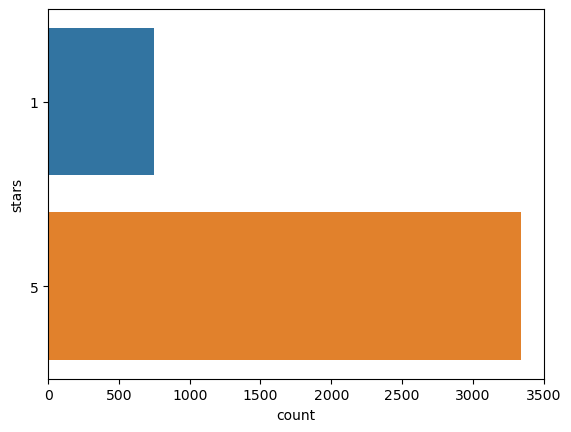

In [18]:
#plot the data 
sns.countplot(y=df_yelp_15['stars'],label='count')

In [19]:
## Remove the punctuation from the text
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
## Remove the stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pk235\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [21]:
df_yelp.iloc[0]['text']

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

In [22]:
def clean_data(x):
    removed_punct=''.join([char for char in x if char not in string.punctuation])
    removed_stopwords=[word for word in removed_punct.split() if word.lower() not in stopwords.words('english')]
    return removed_stopwords
    

In [47]:
df_yelp_15['text'].apply(clean_data)

23      [U, go, n, check, car, u, wanna, buy, 1, Thats...
31      [Disgusting, Groupon, daughter, tried, outdate...
35      [Ive, eaten, many, times, none, bad, last, nig...
61      [always, fan, Burlingtons, deals, however, sho...
64      [Another, night, meeting, friends, laugh, Wait...
                              ...                        
9990    [Yes, rock, hipster, joints, dig, place, littl...
9991    [4, stars, notes, folks, rated, place, low, mu...
9992    [Im, normally, one, jump, reviewing, chain, re...
9994    [Lets, seewhat, like, Surprise, Stadium, Well,...
9999    [45, locations, 45, star, average, think, Ariz...
Name: text, Length: 4086, dtype: object

## Count Vectorizer

This convert the list of sentence into 2d array that keep the fequency of that list of string 

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
test=['i am going home.', 'really are you in home?', 'your home is far from my home!']
vectorizer= CountVectorizer() # initialise the vectorizer

X= vectorizer.fit_transform(test)


In [49]:
X

<3x12 sparse matrix of type '<class 'numpy.int64'>'
	with 14 stored elements in Compressed Sparse Row format>

In [50]:
vectorizer.get_feature_names_out()

array(['am', 'are', 'far', 'from', 'going', 'home', 'in', 'is', 'my',
       'really', 'you', 'your'], dtype=object)

In [51]:
X.toarray()

array([[1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0],
       [0, 0, 1, 1, 0, 2, 0, 1, 1, 0, 0, 1]], dtype=int64)

### Explanattion 
From the example, you can see that matrix has size of (3*12)\
where 3 stand for number of items in list.\
12 is for number of unique words\

row : features name\
col : frequency\

X[2,5]=2 because the word home(5th index) repeats twice in list(2nd index: 3rd sentence)


In [56]:
## apply the count vectorizer on data
vectorizer=CountVectorizer(analyzer=clean_data)
vectorizer_fit=vectorizer.fit_transform(df_yelp_15['text'])

In [58]:
vectorizer.get_feature_names_out()

array(['0', '00s', '01042012', ..., 'École', 'éclairs', 'ém'],
      dtype=object)

In [59]:
vectorizer_fit.shape

(4086, 26435)

In [61]:
vectorizer_fit.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# Train the model

In [62]:
from sklearn.naive_bayes import MultinomialNB

model= MultinomialNB()

In [69]:
true_label=df_yelp_15['stars'].values

In [70]:
true_label

array([1, 1, 1, ..., 5, 5, 5], dtype=int64)

In [71]:
model.fit(vectorizer_fit,true_label)

MultinomialNB()

In [74]:
testing_sample = ['amazing food! highly recommmended']
test_vectorized=vectorizer.transform(testing_sample)
predict_label=model.predict(test_vectorized)

In [75]:
predict_label

array([5], dtype=int64)

## Data splitting for train and test

In [81]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(vectorizer_fit,true_label,test_size=0.2)

In [82]:
X_train.shape

(3268, 26435)

In [83]:
y_train.shape

(3268,)

In [84]:
## Model
NB_classifier=MultinomialNB()
NB_classifier.fit(X_train,y_train)

MultinomialNB()

# Model evaluation

In [85]:
from sklearn.metrics import confusion_matrix,classification_report

y_predict_training= NB_classifier.predict(X_train)

In [86]:
y_predict_training

array([1, 5, 5, ..., 5, 5, 5], dtype=int64)

In [87]:
cm= confusion_matrix(y_train,y_predict_training)
cm

array([[ 515,   64],
       [   4, 2685]], dtype=int64)

<Axes: >

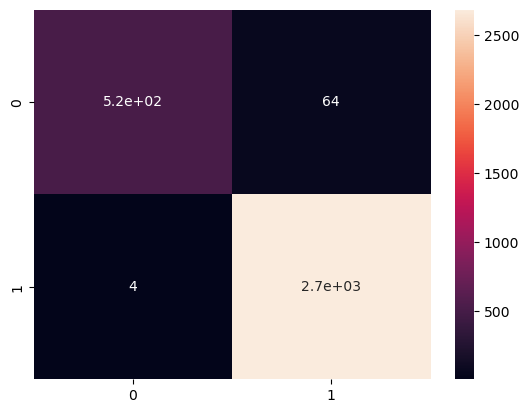

In [88]:
sns.heatmap(cm,annot=True)

<Axes: >

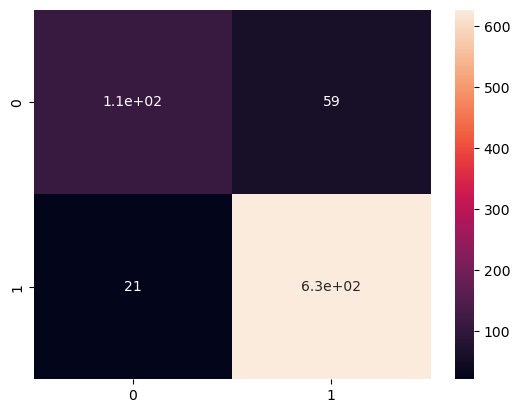

In [89]:
## On test data
y_pred_test=NB_classifier.predict(X_test)
cm_test=confusion_matrix(y_test,y_pred_test)
sns.heatmap(cm_test,annot=True)

In [91]:
## Classification report
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           1       0.84      0.65      0.74       170
           5       0.91      0.97      0.94       648

    accuracy                           0.90       818
   macro avg       0.88      0.81      0.84       818
weighted avg       0.90      0.90      0.90       818



# TF-IDF feature extraction


- Tf–idf stands for "Term Frequency–Inverse Document Frequency" is a numerical statistic used to reflect how important a word is to a document in a collection or corpus of documents. 
- TFIDF is used as a weighting factor during text search processes and text mining.
- The intuition behing the TFIDF is as follows: if a word appears several times in a given document, this word might be meaningful (more important) than other words that appeared fewer times in the same document. However, if a given word appeared several times in a given document but also appeared many times in other documents, there is a probability that this word might be common frequent word such as 'I' 'am'..etc. (not really important or meaningful!).


- TF: Term Frequency is used to measure the frequency of term occurrence in a document: 
    - TF(word) = Number of times the 'word' appears in a document / Total number of terms in the document
- IDF: Inverse Document Frequency is used to measure how important a term is: 
    - IDF(word) = log_e(Total number of documents / Number of documents with the term 'word' in it).

- Example: Let's assume we have a document that contains 1000 words and the term “John” appeared 20 times, the Term-Frequency for the word 'John' can be calculated as follows:
    - TF|john = 20/1000 = 0.02

- Let's calculate the IDF (inverse document frequency) of the word 'john' assuming that it appears 50,000 times in a 1,000,000 million documents (corpus). 
    - IDF|john = log (1,000,000/50,000) = 1.3

- Therefore the overall weight of the word 'john' is as follows 
    - TF-IDF|john = 0.02 * 1.3 = 0.026

In [93]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_vectorizer=TfidfTransformer().fit_transform(vectorizer_fit)

In [94]:

X_train,X_test,y_train,y_test=train_test_split(tfidf_vectorizer,true_label,test_size=0.2)

In [96]:
## Model
NB_classifier_tfidf=MultinomialNB()
NB_classifier_tfidf.fit(X_train,y_train)

MultinomialNB()

<Axes: >

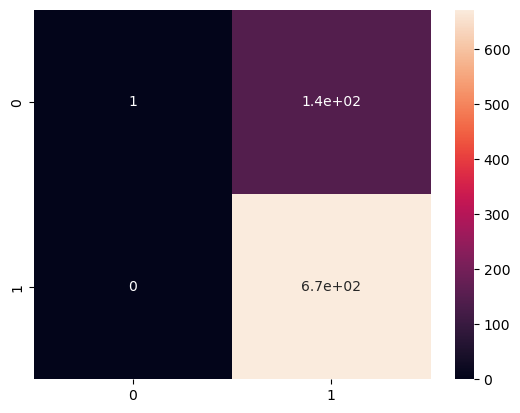

In [99]:
y_pre_test=NB_classifier_tfidf.predict(X_test)
cm_tfidf=confusion_matrix(y_test,y_pre_test)
sns.heatmap(cm_tfidf,annot=True)

This is worst. It conclude that for this problem naiver bayers works pretty good compare to tf-idf vectorizer

In [100]:
a=[1,2]
getsizeof(a)

NameError: name 'getsizeof' is not defined